In [43]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import copy

import numpy as np
from scipy import ndimage

import astropy.units as u
from astropy import wcs
from astropy.io import fits
from astropy.table import Table, Column
from astropy.coordinates import SkyCoord
from astropy.visualization import make_lupton_rgb
from astropy.utils.data import download_file, clear_download_cache

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

from caterpillar import catalog
from caterpillar import selection

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Prepare the `Ladybug` calibration samples

In [44]:
ladybug_dir = '../../data/cosmos/ladybug/'

In [57]:
# Calibration sample
ladybug_1 = Table.read(os.path.join(ladybug_dir, 'ladybug_hsc.fits'))

# Control sample, low-z
ladybug_2 = Table.read(os.path.join(ladybug_dir, 'ladybug_cl_hsc.fits'))

# Control sample, high-z
ladybug_3 = Table.read(os.path.join(ladybug_dir, 'ladybug_ch_hsc.fits'))

print(len(ladybug_1), len(ladybug_2), len(ladybug_3))

252 72 148


In [58]:
hsc_mask_1 = (ladybug_1['object_id'] > 0)

ladybug_1_hsc = catalog.moments_to_shape(ladybug_1, shape_type='i_cmodel_exp_ellipse', update=True)

In [59]:
hsc_mask_2 = (ladybug_2['object_id'] > 0)

ladybug_2_hsc = catalog.moments_to_shape(ladybug_2, shape_type='i_cmodel_exp_ellipse', update=True)

In [60]:
hsc_mask_3 = (ladybug_3['object_id'] > 0)

ladybug_3_hsc = catalog.moments_to_shape(ladybug_3, shape_type='i_cmodel_exp_ellipse', update=True)

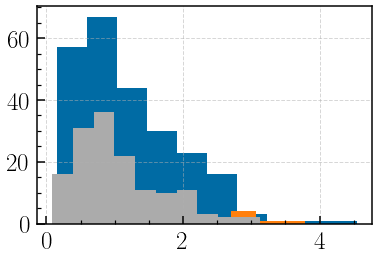

In [61]:
_ = plt.hist(ladybug_1_hsc['i_cmodel_exp_ellipse_r'])
_ = plt.hist(ladybug_2_hsc['i_cmodel_exp_ellipse_r'])
_ = plt.hist(ladybug_3_hsc['i_cmodel_exp_ellipse_r'])

In [62]:
ladybug_1_hsc['i_cmodel_exp_ellipse_r'][~hsc_mask_1] = 0.5
ladybug_2_hsc['i_cmodel_exp_ellipse_r'][~hsc_mask_2] = 0.5
ladybug_3_hsc['i_cmodel_exp_ellipse_r'][~hsc_mask_3] = 0.5

In [63]:
ladybug_1_hsc = selection.add_dynamic_poststamp_size(
    ladybug_1_hsc, size_col='i_cmodel_exp_ellipse_r', size_factor=10., 
    min_size=3, max_size=20)

ladybug_2_hsc = selection.add_dynamic_poststamp_size(
    ladybug_2_hsc, size_col='i_cmodel_exp_ellipse_r', size_factor=10., 
    min_size=3, max_size=20)

ladybug_3_hsc = selection.add_dynamic_poststamp_size(
    ladybug_3_hsc, size_col='i_cmodel_exp_ellipse_r', size_factor=10., 
    min_size=3, max_size=20)

In [67]:
ladybug_1.write(os.path.join(ladybug_dir, 'ladybug_hsc_size.fits'), overwrite=True)
ladybug_2.write(os.path.join(ladybug_dir, 'ladybug_cl_hsc_size.fits'), overwrite=True)
ladybug_3.write(os.path.join(ladybug_dir, 'ladybug_ch_hsc_size.fits'), overwrite=True)